### Proyecto Individual Henry
**3_EDA**  
Analisis exploratorio de datos  
**Autor: Bioing. Urteaga Facundo Nahuel**  

**Resumen:** Se realiza un chequeo general de las variables de cada dato, verificando la existencia de outliers, y se explora en general la distribución de los datos para así comprender mejor la información que estamos manejando para el posterior análisis. Este script comprende las siguientes etapas:

1. **Carga de librerías**
2. **Carga de datos (archivos .parquet)**
3. **EDA en df_games_tec**
4. **EDA en df_reviews**
5. **EDA en df_items**
6. **EDA en df_games_specs df_games_tags y df_games_genres**

In [7]:
# 1. Carga de librerías

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore') # Para evitar los molestos avisos.
import time

In [3]:
# 2. Carga de datos

df_games_tec = pd.read_parquet("df_games_tec.parquet")
df_items = pd.read_parquet("df_items.parquet")
df_reviews = pd.read_parquet("df_reviews.parquet")

In [22]:
df_games_genres = pd.read_parquet("df_games_genres.parquet")
df_games_tags = pd.read_parquet("df_games_tags.parquet")
df_games_specs = pd.read_parquet("df_games_specs.parquet")

In [23]:
df_games_tags.columns

Index(['item_id', 'tags', 'Naval', 'Online Co-Op', 'Exploration', 'Wargame',
       'Tutorial', 'Sandbox', 'Co-op Campaign', 'Management',
       ...
       '3D Platformer', 'Conspiracy', 'Supernatural', 'VR', 'Hand-drawn',
       'Gothic', 'Detective', 'On-Rails Shooter', 'Destruction',
       'Score Attack'],
      dtype='object', length=341)

In [4]:
# 3. EDA en df_games_tec

df_games_tec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32132 entries, 0 to 32131
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   app_name      32132 non-null  object        
 1   item_id       32132 non-null  float64       
 2   publisher     24063 non-null  object        
 3   release_date  29781 non-null  datetime64[ns]
 4   price         32132 non-null  float64       
 5   developer     28835 non-null  object        
 6   release_year  29781 non-null  Int64         
dtypes: Int64(1), datetime64[ns](1), float64(2), object(3)
memory usage: 1.7+ MB


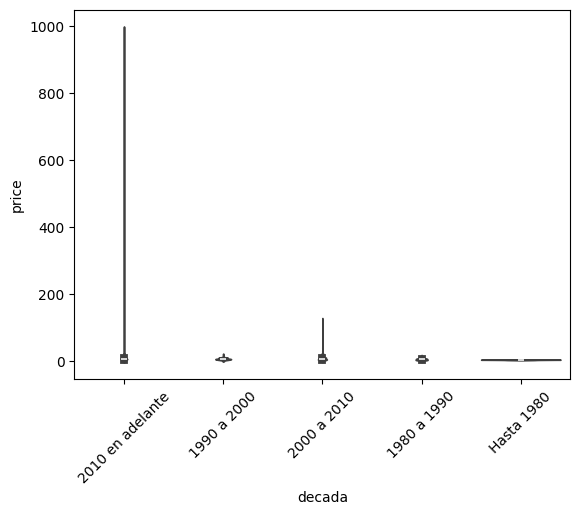

In [8]:
# Eliminar filas con valores NaN en las columnas 'price' y 'release_year'
df_games_tec_clean = df_games_tec.dropna(subset=['price', 'release_year'])

# Función para obtener la década a partir del año
def obtener_decada(year):
    if year <= 1980:
        return "Hasta 1980"
    elif year <= 1990:
        return "1980 a 1990"
    elif year <= 2000:
        return "1990 a 2000"
    elif year <= 2010:
        return "2000 a 2010"
    else:
        return "2010 en adelante"

# Crear una nueva columna 'decada'
df_games_tec_clean['decada'] = df_games_tec_clean['release_year'].apply(obtener_decada)

# Tratar de trazar el violinplot
sns.violinplot(x='decada', y='price', data=df_games_tec_clean)
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor visualización
plt.show()

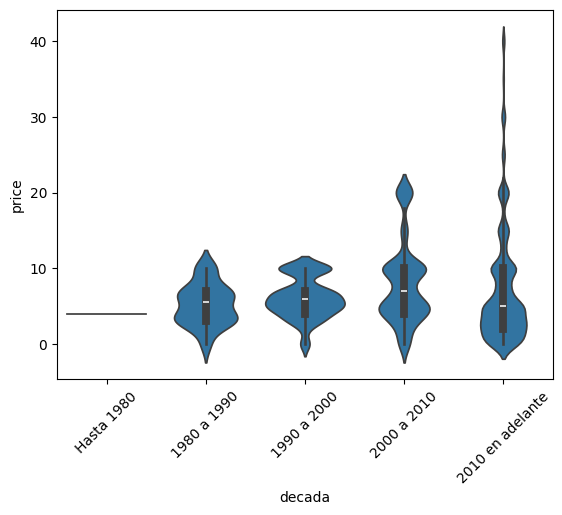

In [9]:
# Función para obtener el 95% de intervalo de confianza
def confidence_interval(data):
    lower_bound = np.percentile(data, 2.5)
    upper_bound = np.percentile(data, 97.5)
    return (lower_bound, upper_bound)

# Calcular el intervalo de confianza para cada década
intervalos_por_decada = df_games_tec_clean.groupby('decada')['price'].apply(confidence_interval)

# Filtrar el DataFrame original para incluir solo las muestras dentro del intervalo de confianza
df_filtered = df_games_tec_clean[df_games_tec_clean.apply(lambda row: row['price'] >= intervalos_por_decada[row['decada']][0] and row['price'] <= intervalos_por_decada[row['decada']][1], axis=1)]

# Tratar de trazar el violinplot
sns.violinplot(x='decada', y='price', data=df_filtered,  order= ["Hasta 1980", "1980 a 1990","1990 a 2000","2000 a 2010", "2010 en adelante"])
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor visualización
plt.show()

In [10]:
# Filtrar el DataFrame para incluir solo la década de 2010 en adelante
df_2010_onwards = df_games_tec_clean[df_games_tec_clean['decada'] == '2010 en adelante']

# Obtener las tres filas con los valores de precio más altos
top_3_prices = df_2010_onwards.nlargest(3, 'price')

# Imprimir las tres filas con los mayores valores de precio
print("Las tres filas con los mayores valores de precio en la década de 2010 en adelante son:")
print(top_3_prices[["app_name","price","developer","publisher"]])

# Por inspección posterior en internet encontramos que no son outliers

Las tres filas con los mayores valores de precio en la década de 2010 en adelante son:
                                              app_name   price  \
12086  Strata Spaces VR – Professional Edition Upgrade  995.00   
2391                        X-Plane 10 Global - 64 Bit  771.71   
23592                                         HTC Vive  599.00   

                        developer                   publisher  
12086  Strata Mixed Reality, Inc.  Strata Mixed Reality, Inc.  
2391             Laminar Research               Aerosoft GmbH  
23592                        None                        None  


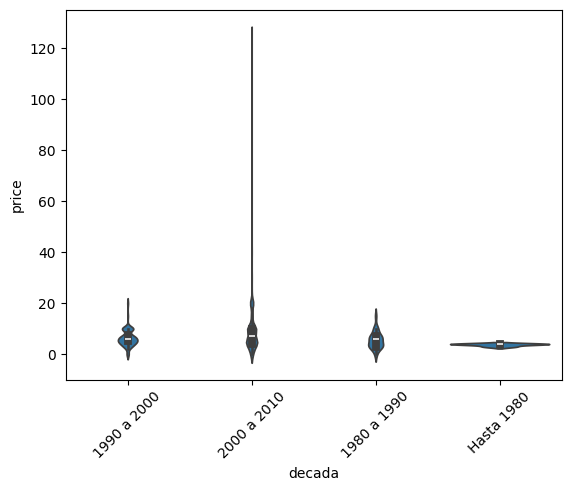

In [11]:
# Filtrar el DataFrame para excluir la década de 2010 en adelante
df_excl_2010_onwards = df_games_tec_clean[df_games_tec_clean['decada'] != '2010 en adelante']

# Tratar de trazar el violinplot
sns.violinplot(x='decada', y='price', data=df_excl_2010_onwards)
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor visualización
plt.show()

In [12]:
# Filtrar el DataFrame para incluir solo la década de 2010 en adelante
df_2000_2010 = df_games_tec_clean[df_games_tec_clean['decada'] == '2000 a 2010']

# Obtener las tres filas con los valores de precio más altos
top_3_prices = df_2000_2010.nlargest(3, 'price')

# Imprimir las tres filas con los mayores valores de precio
print("Las tres filas con los mayores valores de precio en la década de 2010 en adelante son:")
print(top_3_prices[["app_name","price","developer","publisher","release_year"]])

# Por inspección posterior en internet encontramos que no son outliers

Las tres filas con los mayores valores de precio en la década de 2010 en adelante son:
                                   app_name   price    developer  \
28646                              Ohmicide  124.99    Ohm Force   
26179        Gary Grigsby's War in the East   79.99   2by3 Games   
424    SEGA Mega Drive and Genesis Classics   61.99  D3T Limited   

             publisher  release_year  
28646        Ohm Force          2007  
26179  Slitherine Ltd.          2010  
424               SEGA          2010  


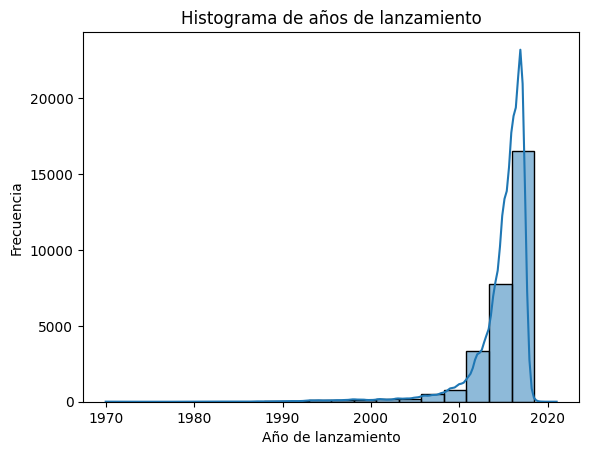

In [13]:
# Trazar el histograma de released_year
sns.histplot(df_games_tec_clean['release_year'], bins=20, kde=True)
plt.title('Histograma de años de lanzamiento')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Frecuencia')
plt.show()

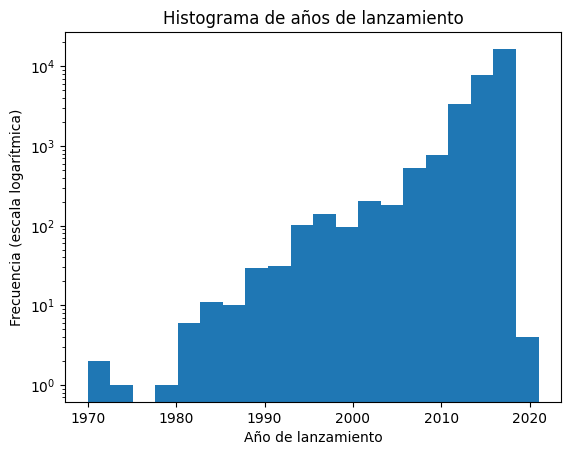

In [14]:
# Calcular el histograma de los años de lanzamiento
hist, bins = np.histogram(df_games_tec_clean['release_year'], bins=20)

# Tratar de trazar el histograma de released_year con el eje y en escala logarítmica
plt.bar(bins[:-1], hist, width=np.diff(bins), align="edge")
plt.yscale("log")
plt.title('Histograma de años de lanzamiento')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Frecuencia (escala logarítmica)')
plt.show()

In [15]:
df_games_tec["developer"].value_counts().head(20)

developer
Ubisoft - San Francisco                                                  1259
SmiteWorks USA, LLC                                                       813
Dovetail Games                                                            253
KOEI TECMO GAMES CO., LTD.                                                232
Paradox Development Studio                                                156
Capcom                                                                    130
Ronimo Games                                                              123
Choice of Games                                                           100
Musopia                                                                    95
Stainless Games                                                            95
N3V Games                                                                  93
Ubisoft Montreal                                                           86
Relic Entertainment,Feral Interactive (Mac),Feral Inte

In [16]:
df_games_tec["publisher"].value_counts().head(20)

publisher
Ubisoft                                                     385
Dovetail Games - Trains                                     360
Degica                                                      286
Paradox Interactive                                         271
SEGA                                                        251
Dovetail Games - Flight                                     220
KOEI TECMO GAMES CO., LTD.                                  208
Activision                                                  202
Big Fish Games                                              195
KISS ltd                                                    189
Dovetail Games                                              176
THQ Nordic                                                  170
Capcom                                                      155
Strategy First                                              144
Square Enix                                                 131
Slitherine Ltd.               

EDA en df_reviews

In [17]:
# 4. EDA en df_reviews

df_reviews.columns

Index(['user_id', 'item_id', 'recommend', 'review', 'op_pos', 'op_tot',
       'op_porc'],
      dtype='object')

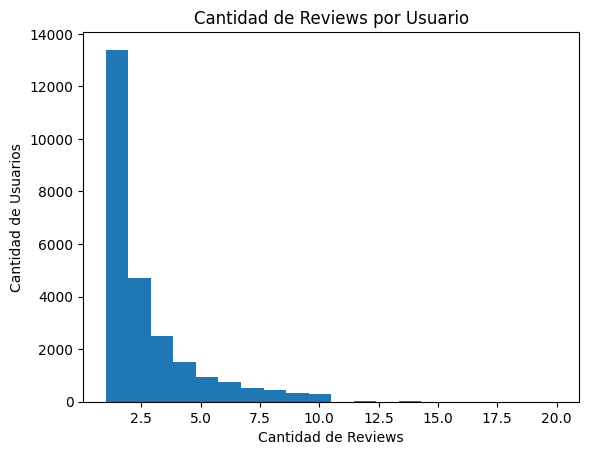

In [18]:
# Contar la cantidad de filas por user_id
counts_por_usuario = df_reviews['user_id'].value_counts()

# Crear un histograma con las frecuencias obtenidas
plt.hist(counts_por_usuario, bins=20)
plt.title('Cantidad de Reviews por Usuario')
plt.xlabel('Cantidad de Reviews')
plt.ylabel('Cantidad de Usuarios')
plt.show()

In [19]:
# 5. EDA en df_items

df_items.columns

Index(['user_id', 'item_id', 'playtime_forever', 'playtime_2weeks'], dtype='object')

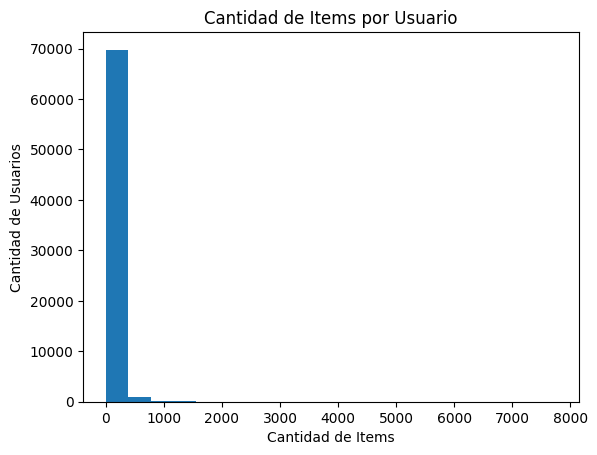

In [20]:
# Contar la cantidad de items por user_id
counts_por_usuario = df_items['user_id'].value_counts()

# Crear un histograma con las frecuencias obtenidas
plt.hist(counts_por_usuario, bins=20)
plt.title('Cantidad de Items por Usuario')
plt.xlabel('Cantidad de Items')
plt.ylabel('Cantidad de Usuarios')
plt.show()

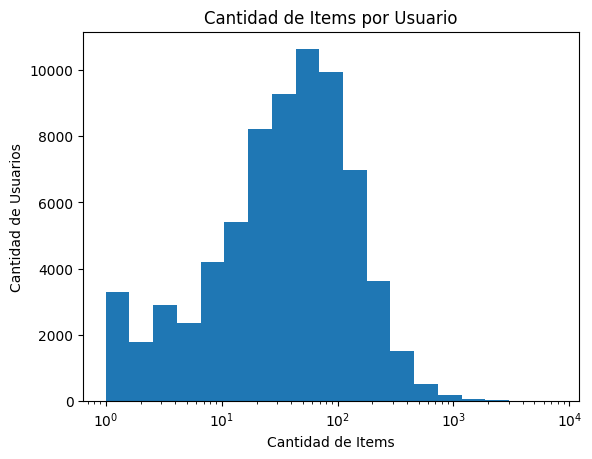

In [21]:
# Contar la cantidad de items por user_id
counts_por_usuario = df_items['user_id'].value_counts()

# Calcular los límites de los bins en escala logarítmica
bins_log = np.logspace(np.log10(counts_por_usuario.min()), np.log10(counts_por_usuario.max()), 20)

# Crear un histograma con bins en escala logarítmica
plt.hist(counts_por_usuario, bins=bins_log)
plt.title('Cantidad de Items por Usuario')
plt.xlabel('Cantidad de Items')
plt.ylabel('Cantidad de Usuarios')
plt.xscale('log')  # Establecer el eje x en escala logarítmica
plt.show()

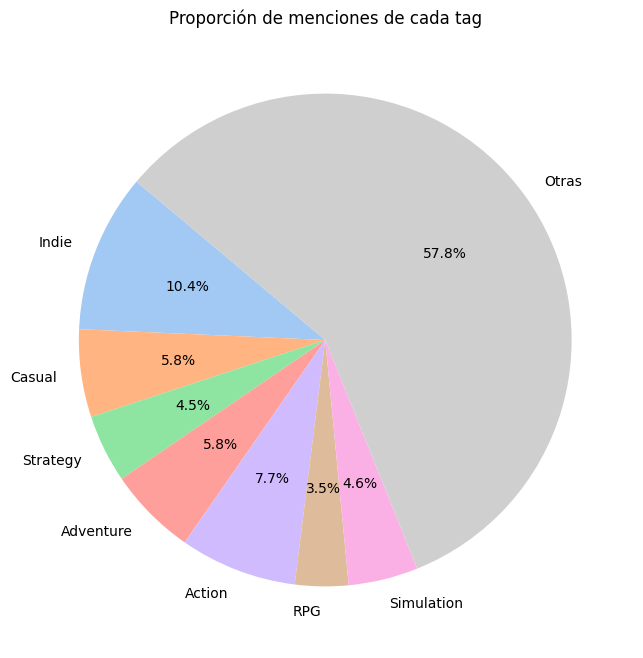

In [30]:
# 6. EDA en df_games_specs df_games_tags y df_games_genres

# Distribución de df_games_tags

tags_columns = df_games_tags.columns[2:]

# Calcular la suma de cada tag
tags_counts = df_games_tags[tags_columns].sum()

# Calcular el porcentaje de cada tag
tags_percentages = tags_counts / tags_counts.sum()

# Filtrar las tags que representan menos del 5% del total
threshold = 0.03
tags_to_keep = tags_percentages[tags_percentages >= threshold]
other_tags_sum = tags_percentages[tags_percentages < threshold].sum()

# Agregar una nueva entrada para las tags filtradas
tags_to_keep['Otras'] = other_tags_sum

# Crear un DataFrame con los recuentos de tags
df_tags_counts = pd.DataFrame({'Tag': tags_to_keep.index, 'Count': tags_to_keep.values})

# Configurar el tamaño del gráfico
plt.figure(figsize=(8, 8))

# Crear el gráfico de torta
sns.set_palette("pastel")  # Cambiar la paleta de colores si deseas
plt.pie(df_tags_counts['Count'], labels=df_tags_counts['Tag'], autopct='%1.1f%%', startangle=140)

# Agregar etiquetas
plt.title('Proporción de menciones de cada tag')

# Mostrar el gráfico
plt.show()

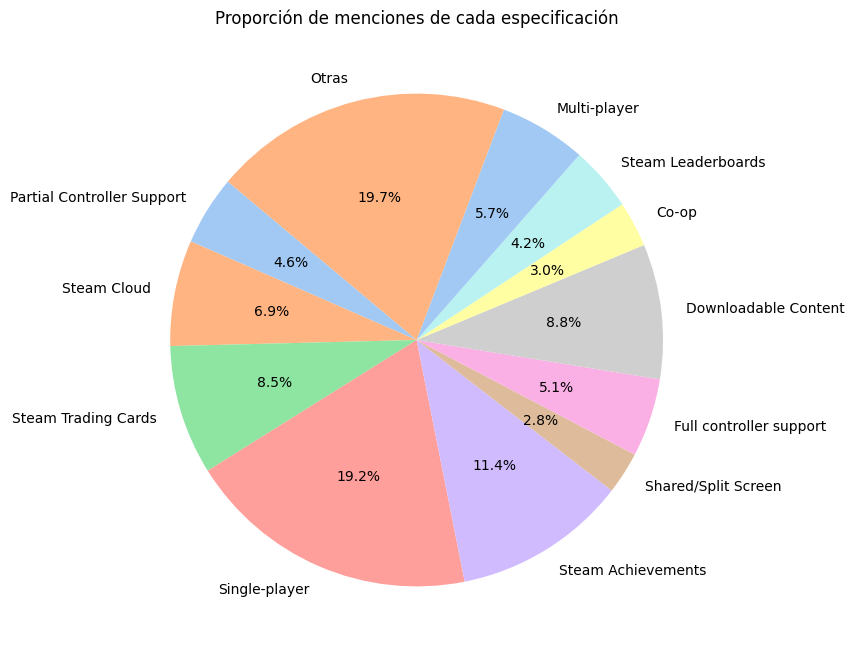

In [33]:
# Distribución de df_games_specs

specs_columns = df_games_specs.columns[2:]

# Calcular la suma de cada especificación
specs_counts = df_games_specs[specs_columns].sum()

# Calcular el porcentaje de cada especificación
specs_percentages = specs_counts / specs_counts.sum()

# Filtrar las especificaciones que representan menos del 5% del total
threshold = 0.02
specs_to_keep = specs_percentages[specs_percentages >= threshold]
other_specs_sum = specs_percentages[specs_percentages < threshold].sum()

# Agregar una nueva entrada para las especificaciones filtradas
specs_to_keep['Otras'] = other_specs_sum

# Crear un DataFrame con los recuentos de especificaciones
df_specs_counts = pd.DataFrame({'Especificación': specs_to_keep.index, 'Count': specs_to_keep.values})

# Configurar el tamaño del gráfico
plt.figure(figsize=(8, 8))

# Crear el gráfico de torta
sns.set_palette("pastel")  # Cambiar la paleta de colores si deseas
plt.pie(df_specs_counts['Count'], labels=df_specs_counts['Especificación'], autopct='%1.1f%%', startangle=140)

# Agregar etiquetas
plt.title('Proporción de menciones de cada especificación')

# Mostrar el gráfico
plt.show()

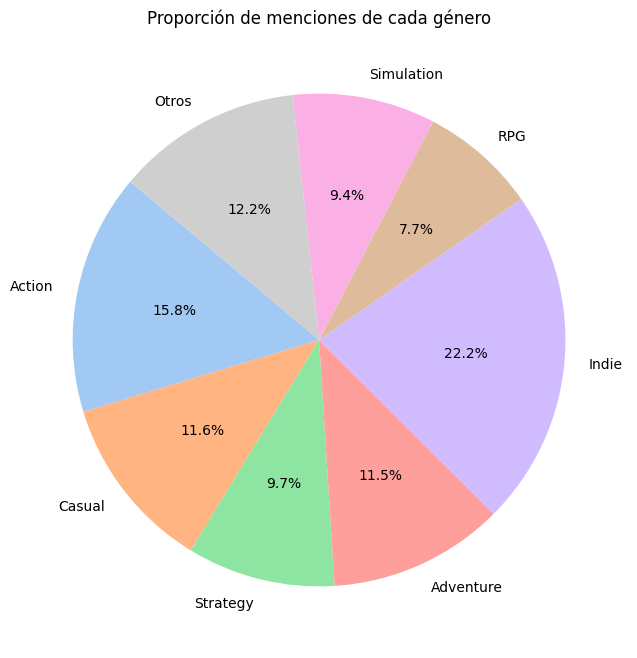

In [35]:
# Distribución de df_games_genres

genres_columns = df_games_genres.columns[2:]

# Calcular la suma de cada género
genres_counts = df_games_genres[genres_columns].sum()

# Calcular el porcentaje de cada género
genres_percentages = genres_counts / genres_counts.sum()

# Filtrar los géneros que representan menos del 5% del total
threshold = 0.03
genres_to_keep = genres_percentages[genres_percentages >= threshold]
other_genres_sum = genres_percentages[genres_percentages < threshold].sum()

# Agregar una nueva entrada para los géneros filtrados
genres_to_keep['Otros'] = other_genres_sum

# Crear un DataFrame con los recuentos de géneros
df_genres_counts = pd.DataFrame({'Género': genres_to_keep.index, 'Count': genres_to_keep.values})

# Configurar el tamaño del gráfico
plt.figure(figsize=(8, 8))

# Crear el gráfico de torta
sns.set_palette("pastel")  # Cambiar la paleta de colores si deseas
plt.pie(df_genres_counts['Count'], labels=df_genres_counts['Género'], autopct='%1.1f%%', startangle=140)

# Agregar etiquetas
plt.title('Proporción de menciones de cada género')

# Mostrar el gráfico
plt.show()

### FIN